## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [1]:
#import networkx as nx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1.1
wiki_RfA = pd.read_csv('wiki-RfA.csv.gz')

In [3]:
wiki_RfA.groupby(['TGT']).size()
print(f'There is {wiki_RfA.TGT.nunique()} user running for RfA')
print(f'The average of votes per RfA is {wiki_RfA.groupby("TGT").size().mean():.2f}')

There is 3439 user running for RfA
The average of votes per RfA is 48.56


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

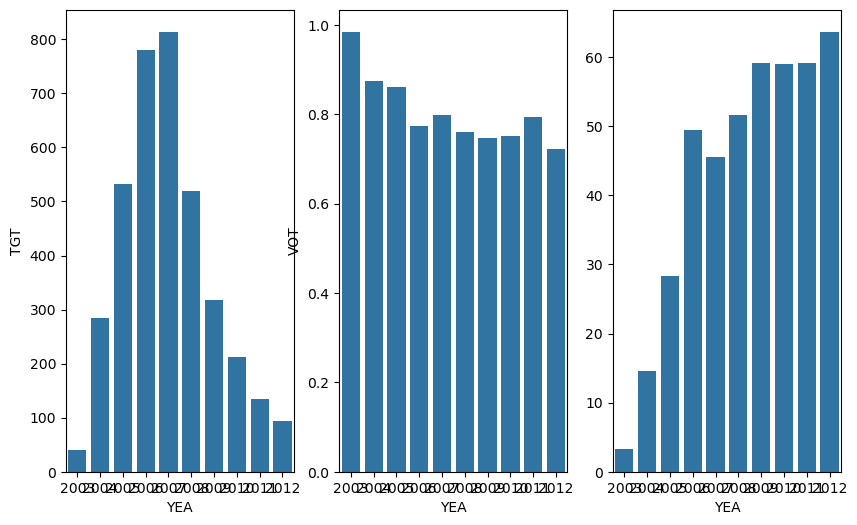

In [4]:
# 1.2 
fig, axes = plt.subplots(1, 3, figsize = (10,6))

RfA_year = wiki_RfA.groupby('YEA').TGT.nunique()
sns.barplot(data=RfA_year, ax=axes[0])

frac_pos = wiki_RfA.groupby('YEA').VOT.apply(lambda x: x.mean()/2+0.5)
sns.barplot(data=frac_pos, ax=axes[1])

nb_votes = wiki_RfA.groupby(['YEA', 'TGT']).size().groupby('YEA').mean()
sns.barplot(data=nb_votes, ax=axes[2])

plt.show()



**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
The users running for RfA strongly increases starting from 2003 until reaching a peak in 2007 and then decreases until 2012. The fraction of positive votes started very high in 2003 (very close to 100% positive votes) and then decreases through the year while always remaining above 50%. The number of votes per RfA generally increases during the whole period.

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [5]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [6]:
# 1.4 
print(f'Number of edges : {len(G.edges)}')
print(f'Number of nodes : {len(G.nodes)}')



Number of edges : 161147
Number of nodes : 10831


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

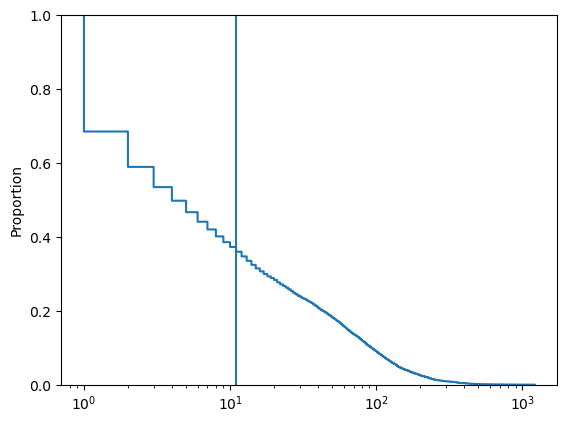

In [7]:
# 1.5
degrees = list(dict(G.degree()).values())

sns.ecdfplot(data=degrees, complementary=True, log_scale=(True, False))
plt.axvline(x=11)
plt.show()


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6**
We use an undirected graph meaning that we merge all voters and votees. Hence when we count the number of edges for the degrees we consider both the number of votes that has been made by each source as well as the number of votes *received* by a target (which is in general way higher and therefore shift the distribution to higher values)

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [8]:
SRC_11votes = (wiki_RfA.groupby('SRC').size() >= 11).sum()
print(f'The fraction of users voted at least 11 times is {SRC_11votes/wiki_RfA.SRC.nunique()}')

The fraction of users voted at least 11 times is 0.27459977567043947


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [9]:
# 2.1
G2004 = G.edge_subgraph(list(wiki_RfA[wiki_RfA.YEA == 2004][['SRC', 'TGT']].itertuples(index=False, name=None)))
len(G2004.edges)

triangles = []
for cliques in nx.enumerate_all_cliques(G2004):
    if len(cliques)==3:
        triangles.append(cliques)
    if len(cliques) > 3: break
print(f'Number of triangles found : {len(triangles)}')

Number of triangles found : 8448


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2**
The clustering coefficient corresponds to the number of edges among the neighbours of a node compared to the potential number of nodes. This means that for a node to have a large clustering coefficient it should be involved in lots of triangles *compared to the number of neighbors it have*. Thus if a node belongs to the largest number of triangles but also in a lot of non-triangular relation then it not necessarily have a high clustering coefficient.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [10]:
votes = []
for element in triangles:
    triangle = G2004.edge_subgraph([(element[0], element[1]), (element[1], element[2]), (element[0], element[2])])
    vals = list(nx.get_edge_attributes(triangle, 'VOT').values())
    if vals == [1,1,1]:
        votes.append('ppp')
    elif vals == [-1,-1,-1]:
        votes.append('mmm')
    elif (vals == [1,1,-1]) | (vals == [1,-1,1]) | (vals == [-1,1,1]):
        votes.append('ppm')
    elif (vals == [1,-1,-1]) | (vals == [-1,1,-1]) | (vals == [-1,-1,1]):
        votes.append('pmm')
votes = pd.Series(votes)

In [11]:
configs = votes.value_counts(normalize=True)
configs

ppp    0.792614
ppm    0.139441
pmm    0.062737
mmm    0.005208
Name: proportion, dtype: float64

In [12]:
balanced_fraction = configs.loc['ppp'] + configs.loc['pmm']
print(f'The fraction of triangles that are "balanced" according to structural balance theory is {balanced_fraction:.2f}')

The fraction of triangles that are "balanced" according to structural balance theory is 0.86


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [22]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
df_2004 = wiki_RfA[wiki_RfA.YEA == 2004].copy(deep=True)
df_2004["VOT_RND"] = np.random.choice(df_2004["VOT"].values, size=len(df_2004), replace=False)

# Create new edge attribute
nx.set_edge_attributes(G2004, pd.DataFrame(index = list(df_2004[['SRC', 'TGT']].itertuples(index=False, name=None)), data=df_2004["VOT_RND"].values).to_dict()[0], 'VOT_RND')

In [23]:
votes = []
for element in triangles:
    triangle = G2004.edge_subgraph([(element[0], element[1]), (element[1], element[2]), (element[0], element[2])])
    vals = list(nx.get_edge_attributes(triangle, 'VOT_RND').values())
    if vals == [1,1,1]:
        votes.append('ppp')
    elif vals == [-1,-1,-1]:
        votes.append('mmm')
    elif (vals == [1,1,-1]) | (vals == [1,-1,1]) | (vals == [-1,1,1]):
        votes.append('ppm')
    elif (vals == [1,-1,-1]) | (vals == [-1,1,-1]) | (vals == [-1,-1,1]):
        votes.append('pmm')
votes = pd.Series(votes)

configs = votes.value_counts(normalize=True)
print(configs)

balanced_fraction = configs.loc['ppp'] + configs.loc['pmm']
print(f'The fraction of triangles that are "balanced" according to structural balance theory is {balanced_fraction:.2f}')

ppp    0.685724
ppm    0.277936
pmm    0.034446
mmm    0.001894
Name: proportion, dtype: float64
The fraction of triangles that are "balanced" according to structural balance theory is 0.72


**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** The fraction of balanced triangle are higher in the dataset we have compared with a random dataset so it indeed suggests that the structural balance theory might be correct on our dataset. But to be sure of that we could reproduce the shuffling multiple times and check with a statistical test if the fractions we get are indeed statistically lower than the value we have with our dataset.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [31]:
extra_df = pd.read_csv('wiki-RfA_extra.csv.gz')

In [34]:
big_df = pd.merge(wiki_RfA, extra_df, how='inner', on=['SRC', 'TGT'])
big_df.drop('TXT', axis=1, inplace=True)

**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [41]:
from sklearn.metrics import roc_auc_score

In [43]:
real_out = big_df.VOT == 1
pred_outA = big_df.PP + big_df.NN >= big_df.PN
pred_outB = big_df.PP >= big_df.PN

In [44]:
scoreA = roc_auc_score(real_out, pred_outA)
scoreB = roc_auc_score(real_out, pred_outB)
print(f'AUC of the classifier A: {scoreA}')
print(f'AUC of the classifier B: {scoreB}')


AUC of the classifier A: 0.525390127858417
AUC of the classifier B: 0.528036104766419


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [48]:
iterations = 200
diffs = np.zeros(iterations)

for i in range(iterations):
    bootstrap_sample = np.random.choice(big_df.index, size=len(big_df), replace=True)
    bootstrap_sample = big_df.loc[bootstrap_sample]
    real_out = bootstrap_sample.VOT == 1
    pred_outA = bootstrap_sample.PP + bootstrap_sample.NN >= bootstrap_sample.PN
    pred_outB = bootstrap_sample.PP >= bootstrap_sample.PN
    diffs[i] = roc_auc_score(real_out, pred_outA) - roc_auc_score(real_out, pred_outB)

iterations_ci = 1000
means = np.zeros(iterations_ci)

for i in range(iterations_ci):
    bootstrap_sample = np.random.choice(diffs, size=len(diffs), replace=True)
    means[i] = np.mean(bootstrap_sample)
    
lower_bound = np.percentile(means, 2.5)
upper_bound = np.percentile(means, 97.5)

print(f'The 95% confidence interval for the AUC/ROC estimated with the bootstrap is from {lower_bound} to {upper_bound}')

The 95% confidence interval for the AUC/ROC estimated with the bootstrap is : -0.002676792469507353 - -0.0026203274874689606


**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** The 95% confidence interval doesn't include the value 0 so there is a statistical difference between both models at the 0.5 level. As the mean difference is negative and as we substracted the model B from the model A this means that the model B, the weak structural balance theory, is better to predict the outcome.

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack

In [55]:
# remove nan
text_df = big_df.TXT_PROCESSED.dropna()
real_out = big_df.loc[text_df.index].VOT

In [56]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=150)
Tfidf = vectorizer.fit_transform(text_df)
X_train, X_test, y_train, y_test = train_test_split(Tfidf, real_out, test_size=0.1, random_state=42)

In [71]:
clfA = SGDClassifier(loss='log_loss', max_iter=2000).fit(X_train, y_train)
predA = clfA.predict(X_test)

X_trainB = hstack([X_train,big_df.loc[y_train.index][['PP', 'NN', 'PN', 'P', 'N']]])
X_testB = hstack([X_test,big_df.loc[y_test.index][['PP', 'NN', 'PN', 'P', 'N']]])
clfB = SGDClassifier(loss='log_loss', max_iter=2000).fit(X_trainB, y_train)
predB = clfB.predict(X_testB)

In [74]:
print(f'AUC of the first model: {roc_auc_score(y_test, predA)}')
print(f'AUC of the second model: {roc_auc_score(y_test, predB)}')

AUC of the first model: 0.7110333295621243
AUC of the second model: 0.7857231693937385


**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** The AUC score of the model with graph information is higher than the one without them so it might suggest that these informations help to predict more accurately the vote of a source for a specific target. However to be sure of these assumptions it would be good to use cross validation and repeat the same test several times to then be able to implement a statistical test and check if the difference in performance between both models are indeed significant 

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [81]:
cols = ['PP', 'NN', 'PN', 'N']
for col in cols :
    big_df[col] = (big_df[col] - big_df[col].mean())/big_df[col].std()

big_df.VOT = (big_df.VOT == 1).astype(int)

In [82]:
import statsmodels.formula.api as smf

mod = smf.logit(formula='VOT ~ PP + NN + PN', data=big_df)
res = mod.fit()
print(res.summary())

mod = smf.logit(formula='VOT ~ PP + NN + PN + N', data=big_df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.514594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    VOT   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166999
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.01804
Time:                        21:17:17   Log-Likelihood:                -85939.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3092      0.006    214.006      0.000       1.297       1.321
PP             0.4409      0.

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** When all other predictors take mean values, an increase of PP by 1 standard deviation, leads on average to an increase by 0.4409 of log odds of getting a positive vote. This is in accordance with structural balance theory as it states that we want to maximise the balance structure namely {+++} and {+--}. Thus if we have more PP then the only balance structure we can reach is {+++} so we need a third positive vote.

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  Both coefficients decreases in the second regression and since the number of PN and NN are obviously correlated with the number of negative vote (i.e. N), then PN and NN were also working as a proxy for N, but when we add N explicitly, this proxy effect disappears.

---